# **1. Defining the problem**
This dataset contains the data of few people medical history, whether they have a certain medical condition or not, if they have gone through any surgery previously, their age, height and weight.

Based on all this conditions a person pays different amount of Medical Insurance Premium, which is also present in the dataset.

From this data, we have to analyze, what factors and what medical conditions is affecting or varying the premium amount. Also by further exploring, we can alanyze the impact of a persons age and weight on the different conditions occured.

**Understanding data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [ ]:
df=pd.read_csv('/content/insurance.csv')

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**EDA**

Text(0, 0.5, 'count')

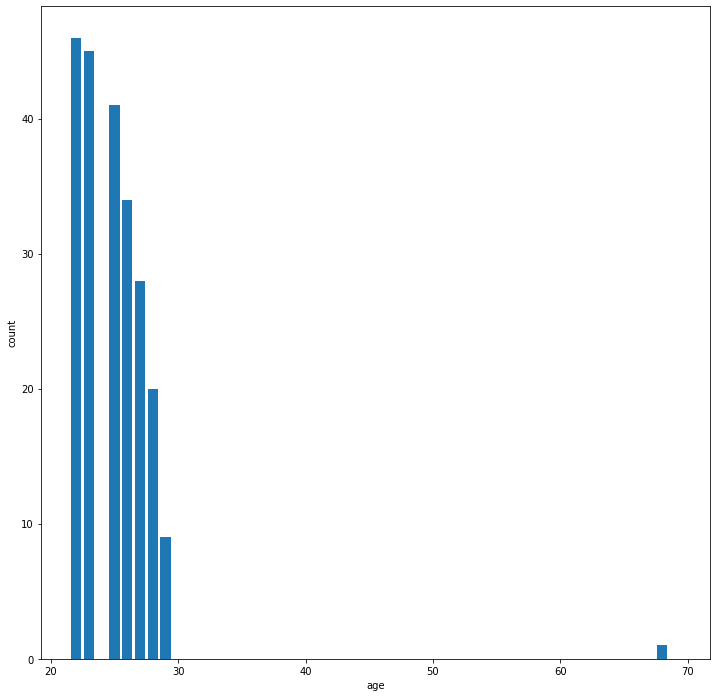

In [ ]:
plt.figure(figsize=(12,12))
count_age=df['age'].value_counts().reset_index(drop=True)
plt.bar(count_age.values,count_age.index)
plt.xlabel("age")
plt.ylabel("count")

In [ ]:
count_age

0     69
1     68
2     29
3     29
4     29
5     29
6     29
7     29
8     29
9     29
10    28
11    28
12    28
13    28
14    28
15    28
16    28
17    28
18    28
19    28
20    28
21    27
22    27
23    27
24    27
25    27
26    27
27    27
28    27
29    26
30    26
31    26
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    25
41    25
42    23
43    23
44    23
45    23
46    22
Name: age, dtype: int64

Text(0, 0.5, 'count')

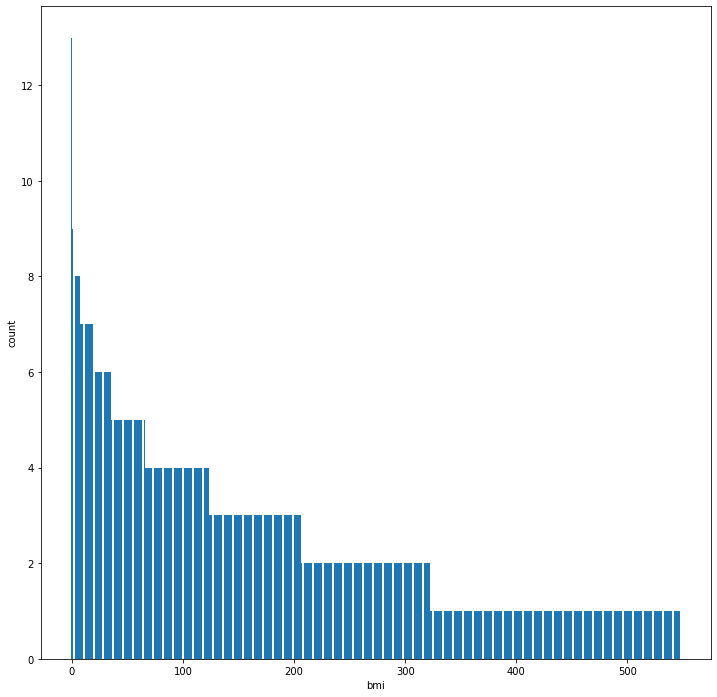

In [ ]:
plt.figure(figsize=(12,12))
count_bmi=df['bmi'].value_counts().reset_index(drop=True)
plt.bar(count_bmi.index,count_bmi.values)
plt.xlabel("bmi")
plt.ylabel("count")

In [ ]:
count_bmi

0      13
1       9
2       8
3       8
4       8
       ..
543     1
544     1
545     1
546     1
547     1
Name: bmi, Length: 548, dtype: int64

Text(0, 0.5, 'count')

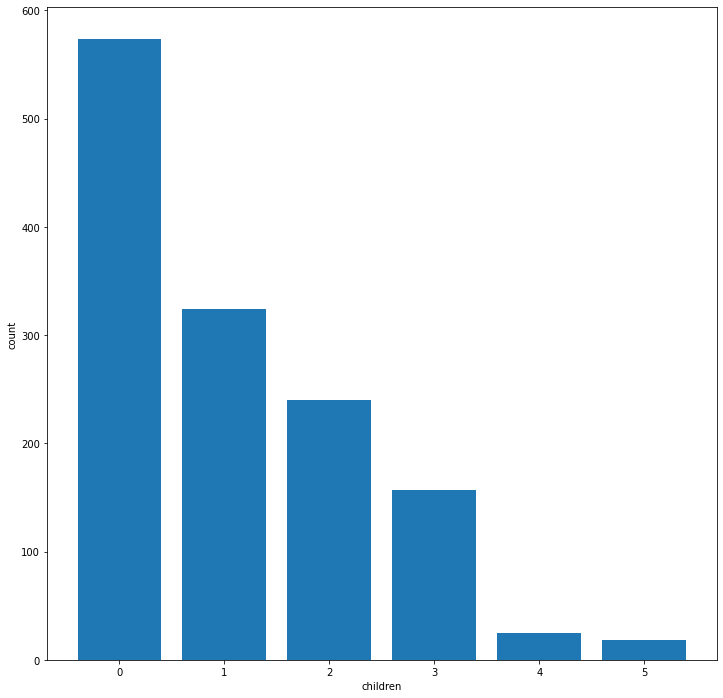

In [ ]:
plt.figure(figsize=(12,12))
count_children=df['children'].value_counts().reset_index(drop=True)
plt.bar(count_children.index,count_children.values)
plt.xlabel("children")
plt.ylabel("count")

In [ ]:
df['charges']=df['charges'].astype(int)

In [ ]:
df['charge_bins'] = pd.cut(x=df['charges'],bins=[0,10000,20000,30000,40000,50000,60000],right=False)

In [ ]:
df[['charges','charge_bins']].head()

,charges,charge_bins
0,16884,"[10000, 20000)"
1,1725,"[0, 10000)"
2,4449,"[0, 10000)"
3,21984,"[20000, 30000)"
4,3866,"[0, 10000)"


Text(0, 0.5, 'count')

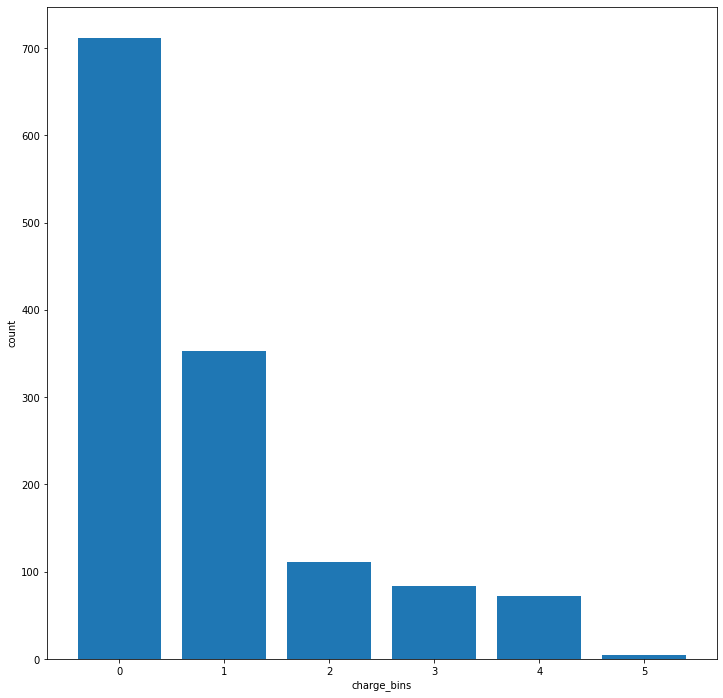

In [ ]:
plt.figure(figsize=(12,12))
count_charge_bins=df['charge_bins'].value_counts().reset_index(drop=True)
plt.bar(count_charge_bins.index,count_charge_bins.values)
plt.xlabel("charge_bins")
plt.ylabel("count")

In [ ]:
count_bmi

0      13
1       9
2       8
3       8
4       8
       ..
543     1
544     1
545     1
546     1
547     1
Name: bmi, Length: 548, dtype: int64

<BarContainer object of 47 artists>

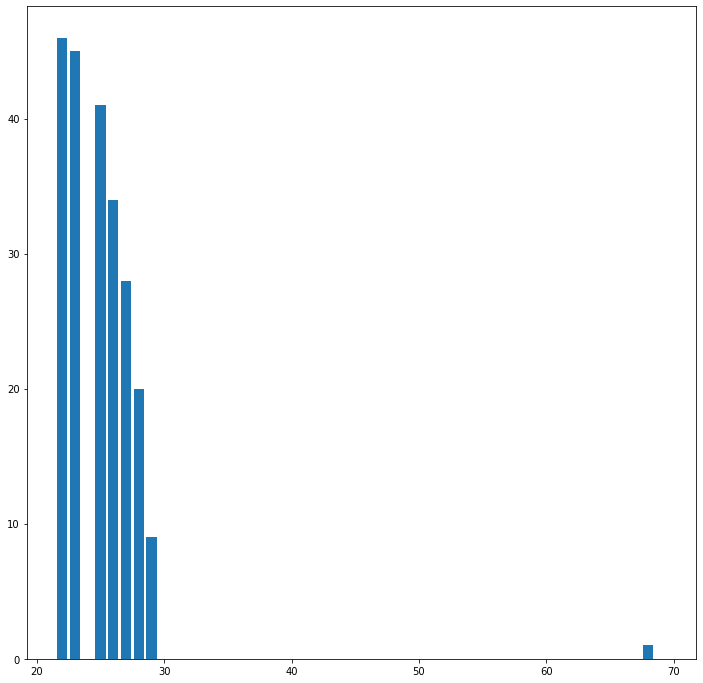

In [ ]:
plt.figure(figsize=(12,12))
count_age=df['age'].value_counts().reset_index(drop=True)
plt.bar(count_age.values,count_age.index)

In [ ]:
df.drop(["charge_bins"],inplace=True,axis=1)

In [ ]:
df=pd.get_dummies(df)

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884,1,0,0,1,0,0,0,1
1,18,33.770,1,1725,0,1,1,0,0,0,1,0
2,28,33.000,3,4449,0,1,1,0,0,0,1,0
3,33,22.705,0,21984,0,1,1,0,0,1,0,0
4,32,28.880,0,3866,0,1,1,0,0,1,0,0


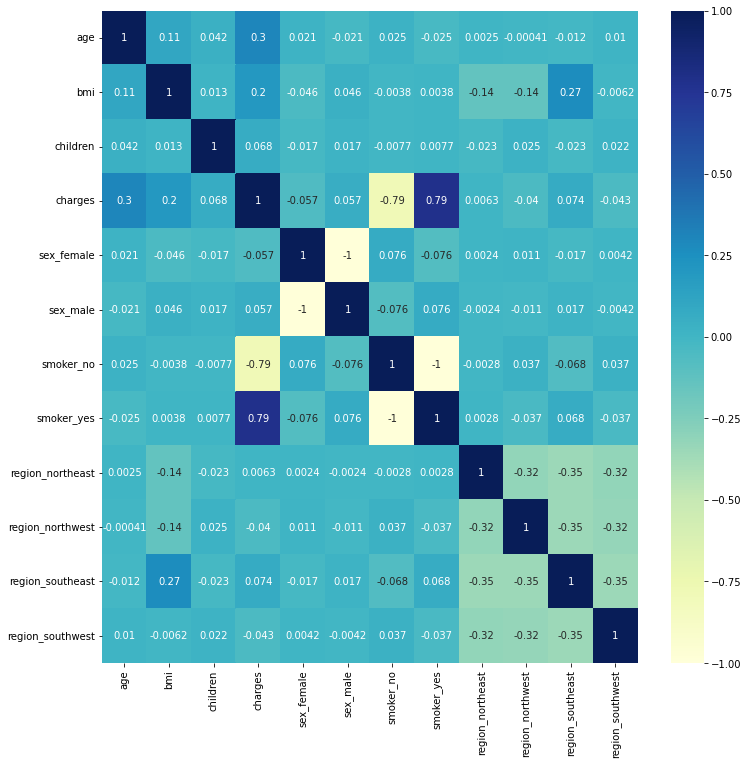

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<Figure size 1080x1080 with 0 Axes>

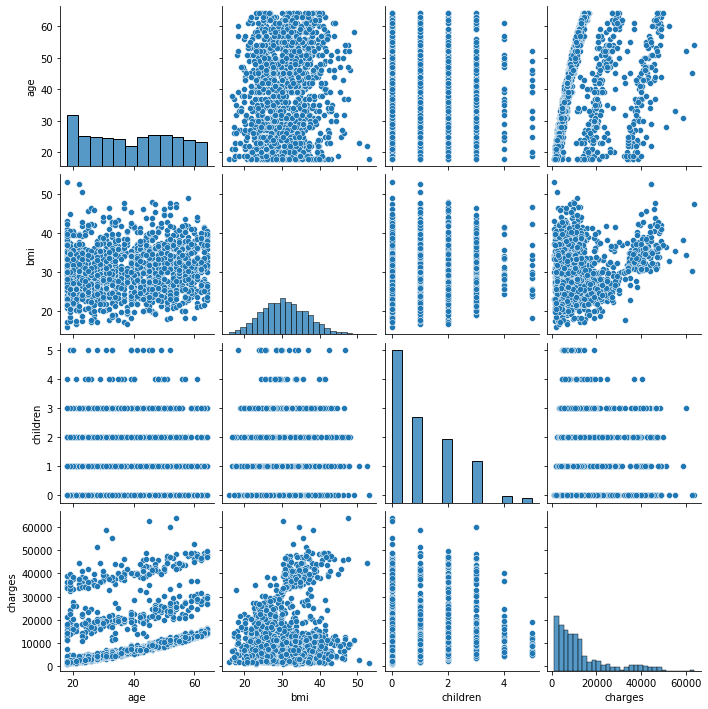

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(df[['age','bmi','children','charges']])

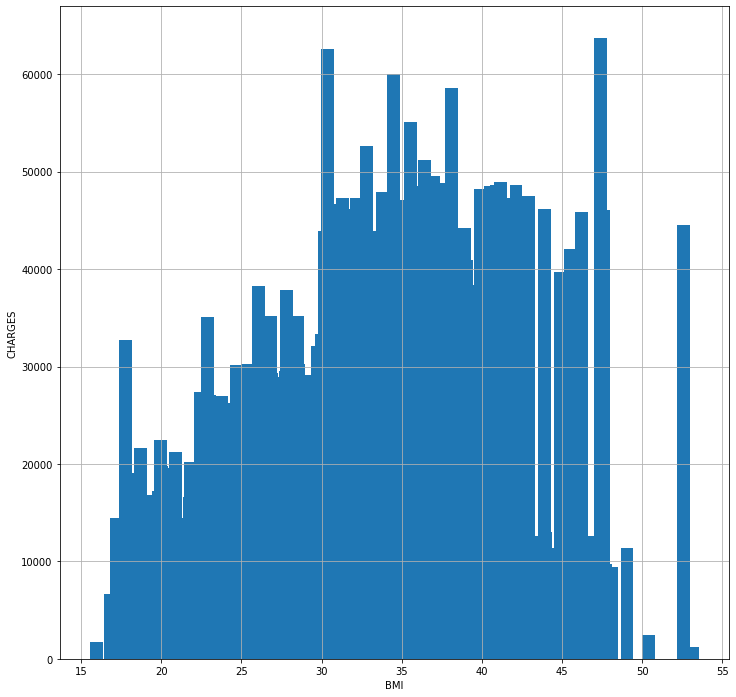

In [ ]:
plt.figure(figsize=(12,12))
plt.bar(df['bmi'],df['charges'])
plt.xlabel("BMI")
plt.ylabel("CHARGES")
plt.grid()


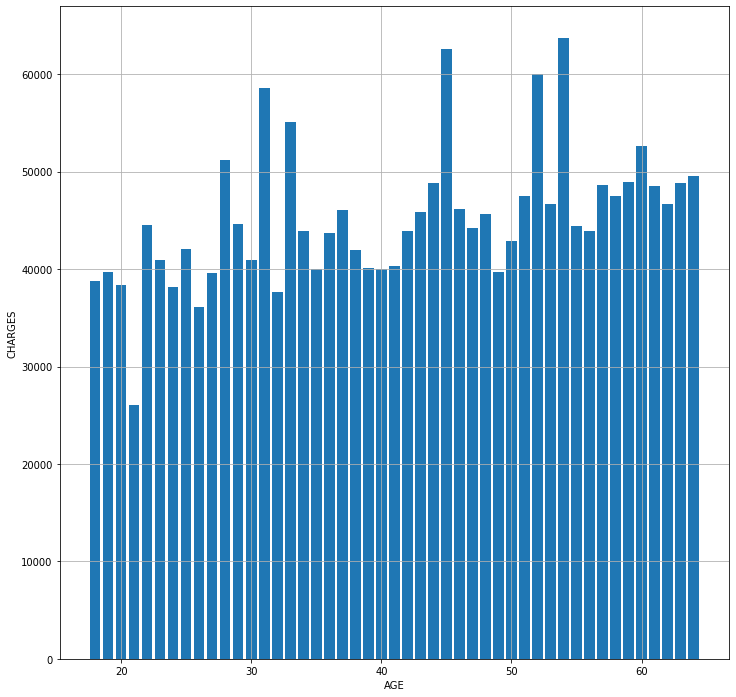

In [ ]:
plt.figure(figsize=(12,12))
plt.bar(df['age'],df['charges'])
plt.xlabel("AGE")
plt.ylabel("CHARGES")
plt.grid()

**outlier detection**

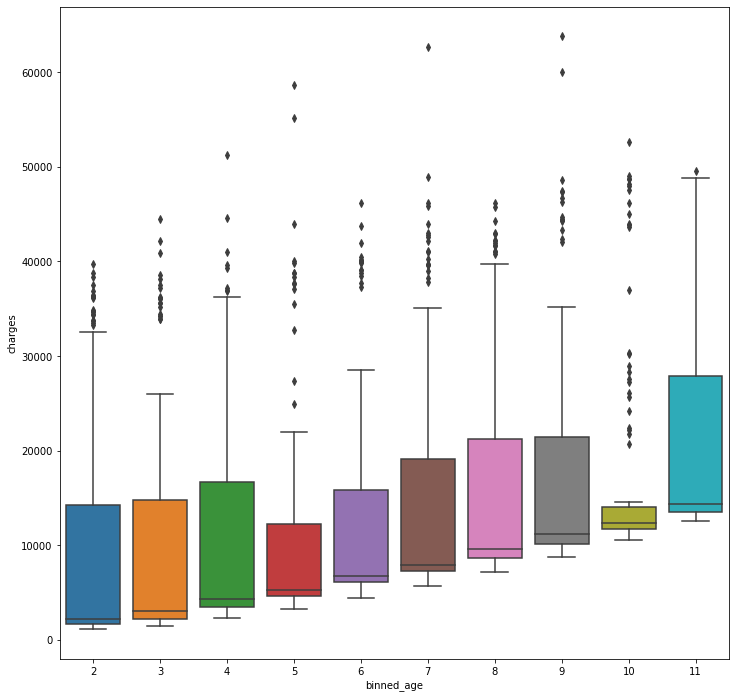

In [ ]:
plt.figure(figsize=(12,12))
bins = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
df['binned_age'] = np.searchsorted(bins, df['age'].values)
ax = sns.boxplot(x="binned_age", y="charges", data=df)

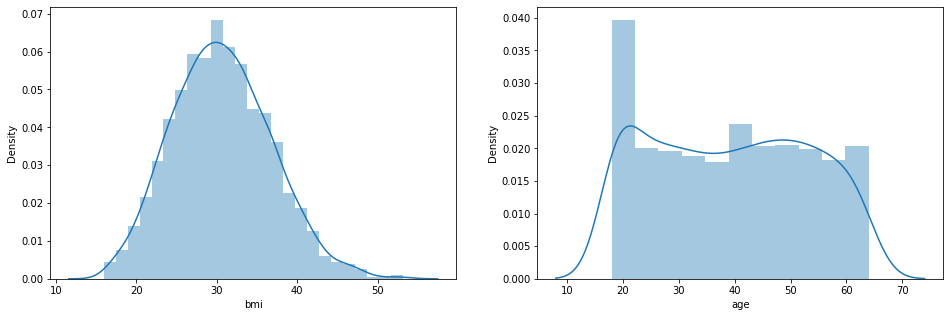

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['bmi'])
plt.subplot(1,2,2)
sns.distplot(df['age'])
plt.show()

**outlier removal**

In [ ]:
print("Highest allowed",df['age'].mean() + 3*df['age'].std())
print("Lowest allowed",df['age'].mean() - 3*df['age'].std())

Highest allowed 81.3569065487098
Lowest allowed -2.9428557265872257


In [ ]:
df[(df['age'] < 82) | (df['age'] < -2)]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,binned_age
0,19,27.900,0,16884,1,0,0,1,0,0,0,1,2
1,18,33.770,1,1725,0,1,1,0,0,0,1,0,2
2,28,33.000,3,4449,0,1,1,0,0,0,1,0,4
3,33,22.705,0,21984,0,1,1,0,0,1,0,0,5
4,32,28.880,0,3866,0,1,1,0,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600,0,1,1,0,0,1,0,0,8
1334,18,31.920,0,2205,1,0,1,0,1,0,0,0,2
1335,18,36.850,0,1629,1,0,1,0,0,0,1,0,2
1336,21,25.800,0,2007,1,0,1,0,0,0,0,1,3


**feature engineering** 

In [ ]:
stc=[]
for index in range(0,len(df['age'])):
  try:
    stc.append(df['smoker_yes'].tolist()[index]/df['children'].tolist()[index])
  except Exception as e:
    stc.append(0)
    continue

In [ ]:
df['smoke_to_child']=stc

In [ ]:
df['smoke_to_child'].corr(df['charges'])

0.5239879717982246

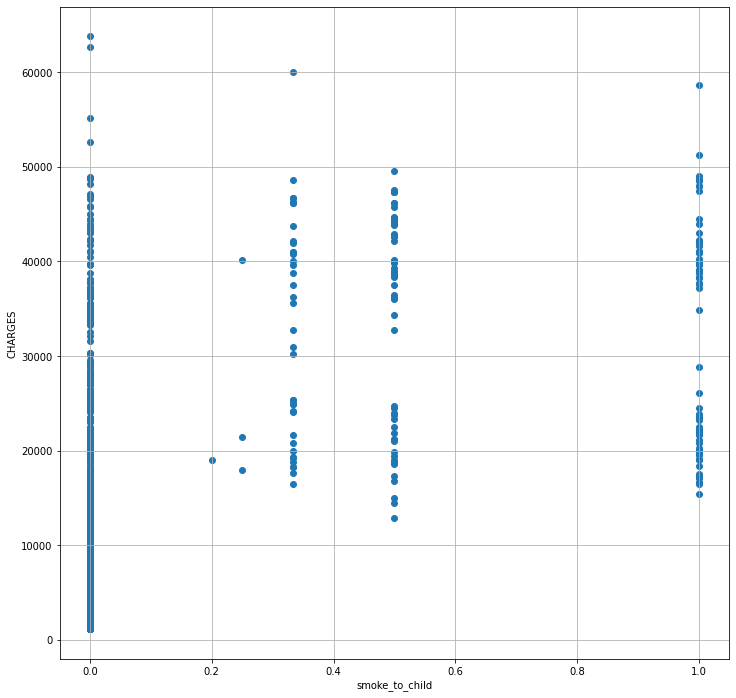

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(df['smoke_to_child'],df['charges'])
plt.xlabel("smoke_to_child")
plt.ylabel("CHARGES")
plt.grid()

# **Machine Learning model**

In [ ]:
df_copy=df.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_copy[["age","bmi"]])
df_copy[["age","bmi"]]=scaler.transform(df_copy[["age","bmi"]])

In [ ]:
df_copy.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,binned_age,smoke_to_child
0,0.021739,0.321227,0,16884,1,0,0,1,0,0,0,1,2,0.0
1,0.000000,0.479150,1,1725,0,1,1,0,0,0,1,0,2,0.0
2,0.217391,0.458434,3,4449,0,1,1,0,0,0,1,0,4,0.0
3,0.326087,0.181464,0,21984,0,1,1,0,0,1,0,0,5,0.0
4,0.304348,0.347592,0,3866,0,1,1,0,0,1,0,0,5,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
indep=df_copy['charges']
dep=df_copy[['age', 'bmi','children','sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest','smoke_to_child']]
tnx,ttx,tny,tty=train_test_split(dep,indep,test_size=0.25)

base=RandomForestRegressor(n_estimators=500)
base.fit(tnx,tny)

RandomForestRegressor(n_estimators=500)

In [ ]:
dep

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,smoke_to_child
0,0.021739,0.321227,0,1,0,0,1,0,0,0,1,0.0
1,0.000000,0.479150,1,0,1,1,0,0,0,1,0,0.0
2,0.217391,0.458434,3,0,1,1,0,0,0,1,0,0.0
3,0.326087,0.181464,0,0,1,1,0,0,1,0,0,0.0
4,0.304348,0.347592,0,0,1,1,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,3,0,1,1,0,0,1,0,0,0.0
1334,0.000000,0.429379,0,1,0,1,0,1,0,0,0,0.0
1335,0.000000,0.562012,0,1,0,1,0,0,0,1,0,0.0
1336,0.065217,0.264730,0,1,0,1,0,0,0,0,1,0.0


In [ ]:
dep['smoke_to_child'].unique()

array([0.        , 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       ])

In [ ]:
tnx

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,smoke_to_child
1330,0.847826,0.263115,2,1,0,1,0,0,0,1,0,0.0
1306,0.239130,0.158461,0,1,0,0,1,1,0,0,0,0.0
1030,0.608696,0.207022,1,1,0,0,1,0,1,0,0,1.0
1255,0.521739,0.590261,0,1,0,1,0,0,0,0,1,0.0
865,0.478261,0.375034,2,0,1,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.521739,0.199354,0,1,0,0,1,1,0,0,0,0.0
1134,0.217391,0.480495,0,0,1,1,0,0,1,0,0,0.0
1138,0.326087,0.384450,0,0,1,1,0,0,0,1,0,0.0
322,0.347826,0.399247,0,0,1,0,1,0,0,0,1,0.0


In [ ]:
indep,indep

(0       16884
 1        1725
 2        4449
 3       21984
 4        3866
         ...  
 1333    10600
 1334     2205
 1335     1629
 1336     2007
 1337    29141
 Name: charges, Length: 1338, dtype: int64, 0       16884
 1        1725
 2        4449
 3       21984
 4        3866
         ...  
 1333    10600
 1334     2205
 1335     1629
 1336     2007
 1337    29141
 Name: charges, Length: 1338, dtype: int64)

In [ ]:
dep.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,smoke_to_child
0,0.021739,0.321227,0,1,0,0,1,0,0,0,1,0.0
1,0.000000,0.479150,1,0,1,1,0,0,0,1,0,0.0
2,0.217391,0.458434,3,0,1,1,0,0,0,1,0,0.0
3,0.326087,0.181464,0,0,1,1,0,0,1,0,0,0.0
4,0.304348,0.347592,0,0,1,1,0,0,1,0,0,0.0


In [ ]:
tnx,tnx.shape

(           age       bmi  children  sex_female  sex_male  smoker_no  \
 1330  0.847826  0.263115         2           1         0          1   
 1306  0.239130  0.158461         0           1         0          0   
 1030  0.608696  0.207022         1           1         0          0   
 1255  0.521739  0.590261         0           1         0          1   
 865   0.478261  0.375034         2           0         1          1   
 ...        ...       ...       ...         ...       ...        ...   
 153   0.521739  0.199354         0           1         0          0   
 1134  0.217391  0.480495         0           0         1          1   
 1138  0.326087  0.384450         0           0         1          1   
 322   0.347826  0.399247         0           0         1          0   
 368   0.565217  0.431934         2           0         1          1   
 
       smoker_yes  region_northeast  region_northwest  region_southeast  \
 1330           0                 0                 0      

In [ ]:
tny.head(),tny.shape

(1330    12629
 1306    16115
 1030    21677
 1255     6474
 865      6600
 Name: charges, dtype: int64, (1003,))

In [ ]:
#Doing hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [i*200 for i in range(1,11)]
max_features = ['auto', 'sqrt']
max_depth = [x*10 for x in range(1,11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(tnx, tny)
para=rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
from sklearn.metrics import r2_score
def evalu(model,y_test, x_test):
  pred=model.predict(x_test)
  accuracy=r2_score(y_test, pred)*100

  print(f'''
  accuracy={accuracy}
  ''')
  
  return pred


print("Base model")

pred_base=evalu(base,tty,ttx)

print("Best model")
best_random = rf_random.best_estimator_
pred_best=evalu(best_random, tty,ttx)



Base model

  accuracy=84.50862294716144
  
Best model

  accuracy=85.49574099956033
  


In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=1200)

In [ ]:
import pickle
with open('model_rf.pkl', 'wb') as files:
    pickle.dump(rf_random, files)

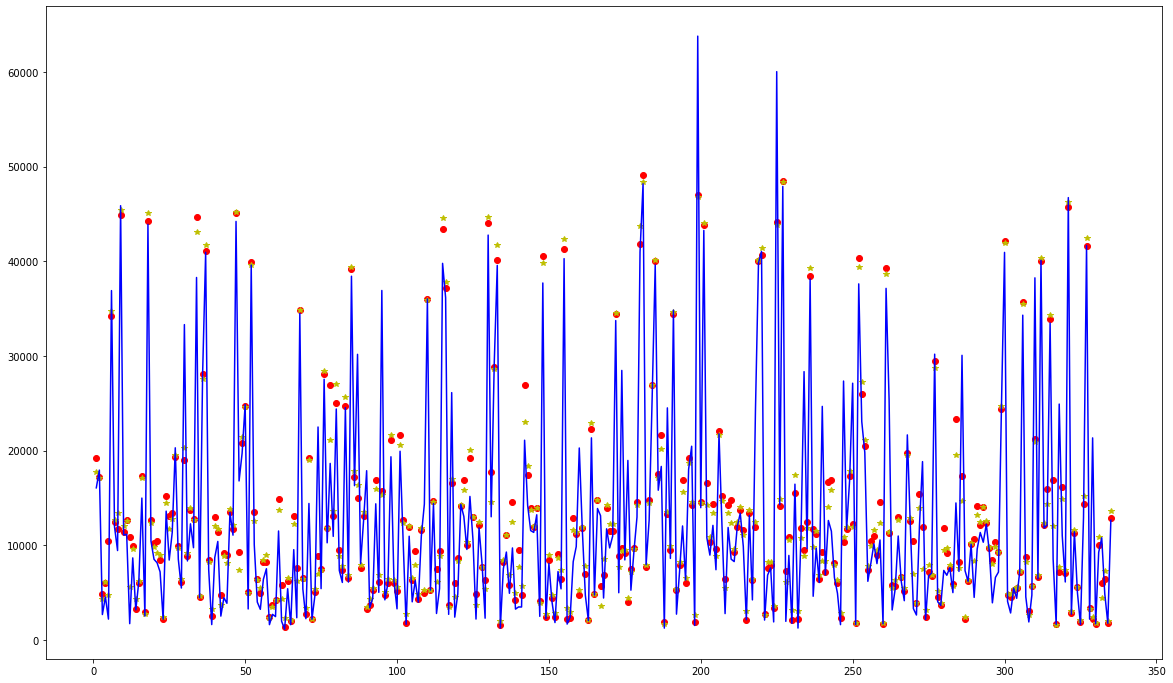

In [ ]:
#plot graph of predict and original values
plt.figure(figsize=(20,12))
xpoint=[x for x in range(1,336)]
plt.plot(xpoint,pred_base,'ro', label='Prediction by base')
plt.plot(xpoint,pred_best,'y*', label="Prediction by best")
plt.plot(xpoint,tty,'b-',label='Actual value')
plt.show()

In [ ]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']

# **Deep learning model**

In [ ]:
loss=tf.keras.losses.Huber()
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(10, activation='relu',input_shape=(12,)),
      layers.Dense(5, activation='relu'),
      layers.Dense(1,activation='linear')
  ])

  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
  return model

In [ ]:
dnn_insurence=build_and_compile_model()

In [ ]:
history = dnn_insurence.fit(
    tnx,
    tny,
    validation_split=0.2,
    verbose=0, epochs=1000)

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(12,12))
  plt.plot(np.arange(1,len(history.history['loss'])+1),history.history['loss'], label='loss')
  plt.plot(np.arange(1,len(history.history['val_loss'])+1),history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  plt.show()

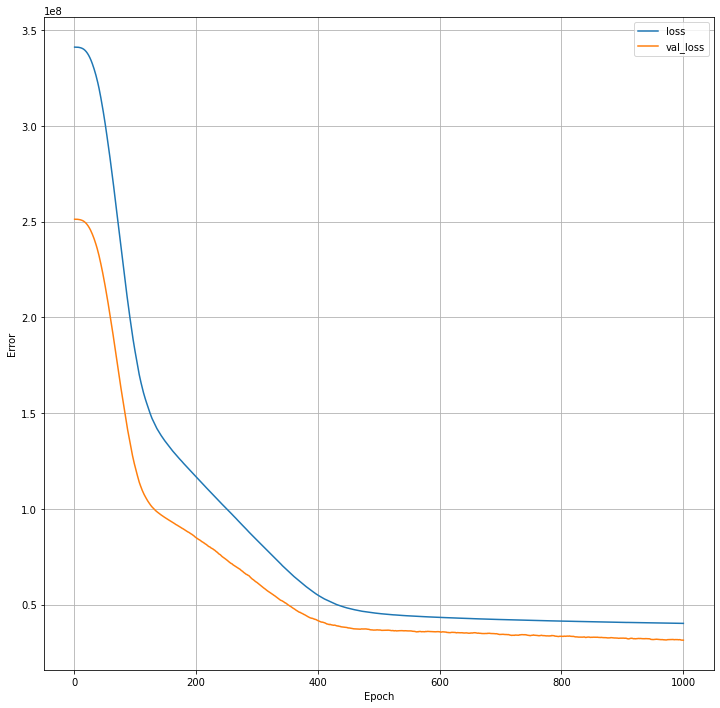

In [ ]:
plot_loss(history)

In [ ]:
import pickle
with open('model_dnn.pkl', 'wb') as files:
    pickle.dump(dnn_insurence, files)

INFO:tensorflow:Assets written to: ram://0dff480b-1b26-40cb-b142-ee14367e86d7/assets


In [ ]:
dnn_insurence.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
